In [1]:
# 07-2 slope

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df=pd.read_csv('data/slope.csv', header=None)

# 数据探索

In [ ]:
# 加载库、数据集
import pandas as pd
df=pd.read_csv('data/slope.csv', header=None)
df.head()  # 数据前五行
df.shape  # 数据行列数
df.info()  # 数据整体信息
df.describe()   # 描述性统计
df.groupby(6).size() # 数据的分类分布

In [3]:
df.head()  # 数据前五行

,0,1,2,3,4,5,6
0,12.00,0.00,30.0,35.0,8.00,0.31,-1
1,23.47,0.00,32.0,37.0,214.00,0.31,-1
2,16.00,70.00,20.0,40.0,115.00,0.31,-1
3,20.41,24.91,13.0,22.0,10.67,0.35,1
4,19.63,11.97,20.0,22.0,12.19,0.41,-1


In [4]:
df.shape  # 数据行列数

(67, 7)

In [5]:
df.info()  # 数据整体信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       67 non-null     float64
 1   1       67 non-null     float64
 2   2       67 non-null     float64
 3   3       67 non-null     float64
 4   4       67 non-null     float64
 5   5       67 non-null     float64
 6   6       67 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 3.8 KB


In [6]:
df.describe()   # 描述性统计

,0,1,2,3,4,5,6
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,22.605970,29.589104,29.898358,35.853731,144.375672,0.310149,-0.074627
std,5.027561,30.346414,9.897609,10.572095,159.301891,0.076426,1.004738
min,12.000000,0.000000,0.000000,8.000000,3.660000,0.110000,-1.000000
25%,18.840000,10.000000,26.000000,30.000000,12.495000,0.250000,-1.000000
50%,22.400000,20.000000,32.000000,37.800000,76.810000,0.310000,-1.000000
75%,27.000000,46.000000,36.000000,45.000000,266.250000,0.310000,1.000000
max,31.300000,150.000000,45.000000,53.000000,511.000000,0.500000,1.000000


In [8]:
# 数据的分类分布
df.groupby(6).size()

6
-1    36
 1    31
dtype: int64

# 数据预处理

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 数据切分
array = df.values
X = array[:, 0:6].astype(float)
Y = array[:, 6]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
# 数据标准化
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)

# 特征相关性

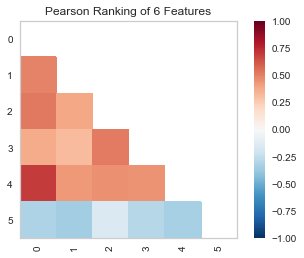

In [14]:
from yellowbrick.features import Rank2D
visualizer = Rank2D(algorithm='pearson')  # 皮尔森相关系数
visualizer.fit(X, Y)           
visualizer.transform(X)        
visualizer.poof()              

# 特征重要性

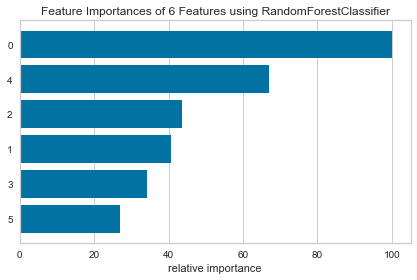

In [16]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.features.importances import FeatureImportances
model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(X, Y)
viz.poof()

# 单一模型评估

## 采用原始数据训练

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR得分： 0.5714285714285714
LDA得分： 0.5714285714285714
KNN得分： 0.5714285714285714
CART得分： 0.9285714285714286
NB得分： 0.5714285714285714
SVM得分： 0.35714285714285715


E:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


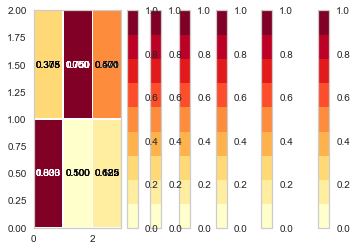

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from yellowbrick.classifier import ClassificationReport
# 模型评估
def test(model,name):
    visualizer = ClassificationReport(model)
    visualizer.fit(X_train, Y_train)
    print(name+'得分：',visualizer.score(X_validation, Y_validation)) 
#     visualizer.poof()
# 评估算法（原始数据）
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()  # 最佳
models['NB'] = GaussianNB()
models['SVM'] = SVC()
for key in models:
    model = models[key]
    test(model,key)    

0.9285714285714286


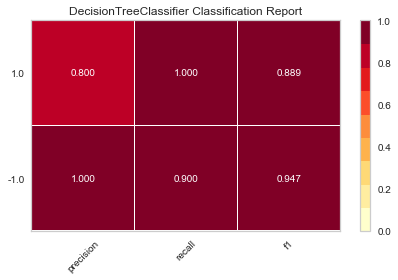

In [18]:
model = DecisionTreeClassifier()
visualizer = ClassificationReport(model)
visualizer.fit(X_train, Y_train)
print(visualizer.score(X_validation, Y_validation))
visualizer.poof()

## 数据标准化后训练

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from yellowbrick.classifier import ClassificationReport
def test(model,name):
    visualizer = ClassificationReport(model)
    visualizer.fit(X_train, Y_train)
    print(name+'得分：',visualizer.score(X_validation, Y_validation)) 
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()  # 最佳
models['NB'] = GaussianNB()
models['SVM'] = SVC()
for key in models:
    model = models[key]
    test(model,key)   

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR得分： 0.5714285714285714
LDA得分： 0.5714285714285714
KNN得分： 0.5
CART得分： 0.9285714285714286
NB得分： 0.5714285714285714
SVM得分： 0.6428571428571429


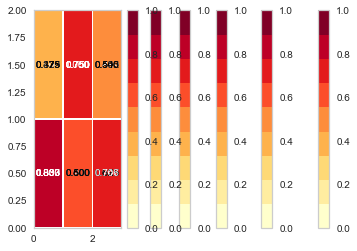

In [19]:

# 评估算法（标准化处理）
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()  # 最佳
models['NB'] = GaussianNB()
models['SVM'] = SVC()
for key in models:
    model = models[key]
    test(model,key)   

0.9285714285714286


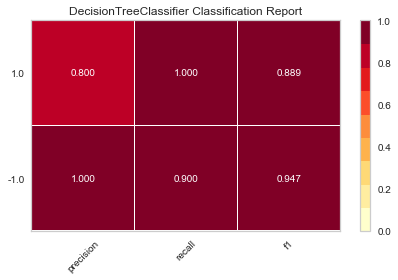

In [20]:
model = DecisionTreeClassifier()
visualizer = ClassificationReport(model)
visualizer.fit(X_train, Y_train)
print(visualizer.score(X_validation, Y_validation))
visualizer.poof()

# 集成学习

ScaledAB得分： 0.8571428571428571
ScaledGBM得分： 0.8571428571428571
ScaledRF得分： 0.9285714285714286


E:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


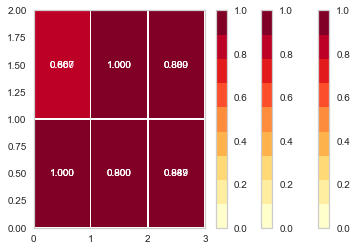

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostClassifier())])
ensembles['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingClassifier())])
ensembles['ScaledRF'] = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestClassifier())])  # 最佳
for key in ensembles:
    model = ensembles[key]
    test(model,key) 

In [39]:
# 采用集成学习的得分和单一模型最高分一致

# 参数优化

In [27]:
param_grid = {'criterion':['gini'],'max_depth':[30,50,60,100],'min_samples_leaf':[2,3,5,10],'min_impurity_decrease':[0.1,0.2,0.5]}
model = DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=X_train, y=Y_train)
print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
                 grid_result.cv_results_['std_test_score'],
                 grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))

最优：0.7735849056603774 使用{'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2}
0.773585 (0.159580) with {'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2}
0.773585 (0.159580) with {'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 3}
0.773585 (0.159580) with {'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 5}
0.773585 (0.159580) with {'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 10}
0.283019 (0.169427) with {'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 2}
0.283019 (0.169427) with {'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 3}
0.283019 (0.169427) with {'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 5}
0.283019 (0.169427) with {'criterion': 'gini', 'max_depth': 30, 

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
num_folds = 10
seed = 7
scoring = 'accuracy'
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900]}
# 梯度提升树
model = RandomForestClassifier()
# K折交叉验证
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=X_train, y=Y_train)
print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


最优：0.7735849056603774 使用{'n_estimators': 400}


# 最终模型

CART得分： 0.6428571428571429


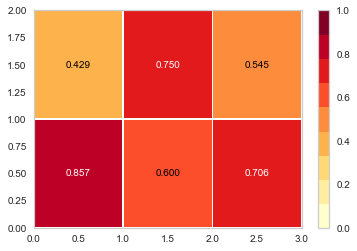

In [34]:
model = DecisionTreeClassifier(criterion= 'gini', max_depth= 30,min_impurity_decrease= 0.1, min_samples_leaf=2)
model.fit(X=X_train, y=Y_train)
test(model,'CART') 

RFC得分： 0.9285714285714286


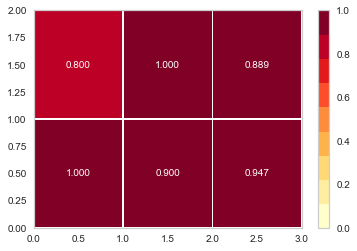

In [33]:
model = RandomForestClassifier(n_estimators=400)
model.fit(X=X_train, y=Y_train)
test(model,'RFC') 

# 模型持久化

## 模型保存

In [35]:
from sklearn.externals import joblib
model_file = 'data/slope.m'
model = RandomForestClassifier(n_estimators=400)
model.fit(X=X_train, y=Y_train)
joblib.dump(model, model_file) 

E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-pac

E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-pac

['data/slope.m']

## 模型加载

In [36]:
model2 = joblib.load(model_file) 
result = model2.score(X_validation, Y_validation)
print("算法评估结果：%.3f%%" % (result * 100))

算法评估结果：92.857%


In [37]:
# 预测测试数据前10
model2.predict(X_validation[0:10])

array([-1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.])

In [38]:
# 对比测试数据真实分类
Y_validation[0:10]

array([-1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.])